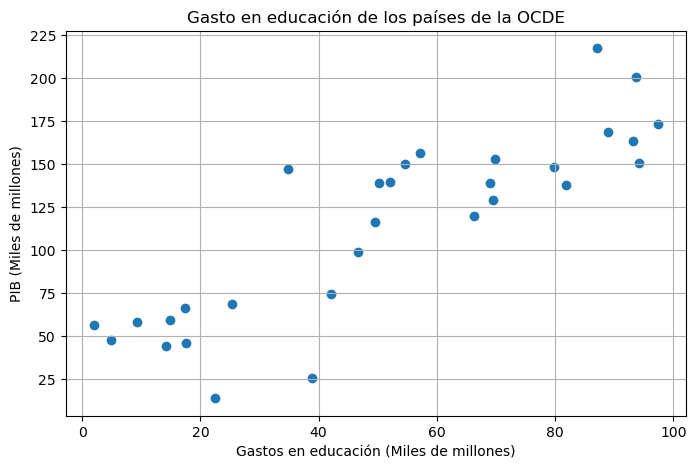

In [2]:
import numpy as np                    # Para manejar arreglos numéricos fácilmente
import matplotlib.pyplot as plt        # Para crear gráficas
import tensorflow as tf                # Librería de redes neuronales
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random                         # Para fijar la semilla aleatoria

# PASO 1

def get_datos():
    datos = [
        [2.01666708, 56.18031474], [4.79734083, 47.18848199], [9.23784581, 57.68974048],
        [14.11529384, 43.70348368], [14.92688637, 59.10244323], [17.34408196, 65.96080804],
        [17.62435324, 45.74334603], [22.41875021, 13.575581], [25.3139145, 68.43756969],
        [34.85886672, 147.15375307], [38.87476262, 25.39687009], [42.01380169, 74.39010069],
        [46.63551059, 98.93395801], [49.58578273, 116.07013679], [50.18371003, 138.55546747],
        [52.06630172, 139.36601894], [54.68810274, 150.09622546], [57.13046193, 156.14375739],
        [66.35609935, 119.75844452], [69.05499042, 139.08155228], [69.51252436, 128.72247348],
        [69.83788756, 152.65110462], [79.76649746, 148.23106977], [81.83730552, 137.86314926],
        [87.09879038, 217.28932067], [89.00469759, 168.64994509], [93.17139213, 163.10598352],
        [93.66070686, 200.47638924], [94.1944751, 150.44019156], [97.36920633, 173.2055957]
    ]
    return datos

# Obtener los datos
datos = np.array(get_datos())  # 🔹 Convertimos la lista a un arreglo NumPy

# Separar en dos listas: gastos (x) y PIB (y)
x = datos[:, 0].reshape(-1, 1)
y = datos[:, 1].reshape(-1, 1)

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.title("Gasto en educación de los países de la OCDE")
plt.xlabel("Gastos en educación (Miles de millones)")
plt.ylabel("PIB (Miles de millones)")
plt.grid(True)

# Mostrar la gráfica
plt.show()


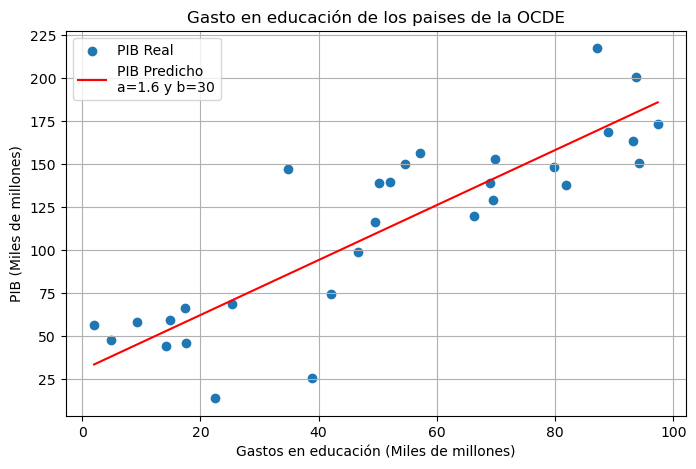

In [3]:
# PASO 2
# Resulta que la ecuación correcta que rige ese modelo es una recta:
# Y = A * X + B
# PIB = A * GASTOS EN EDUCACIÓN + 30
 
# Obtener los datos
# Convertimos la lista de datos devuelta por get_datos() en un arreglo NumPy
# Esto permite hacer operaciones matemáticas fácilmente (por ejemplo, multiplicar por una constante)
datos = np.array(get_datos())

# Seleccionamos la primera columna del arreglo (índice 0) → Gasto en educación
x = datos[:, 0]

# Seleccionamos la segunda columna del arreglo (índice 1) → PIB
y = datos[:, 1]

# Definimos los parámetros del modelo lineal (una recta)
# Fórmula: Y = a * X + b
a = 1.6   # pendiente → indica cuánto aumenta el PIB por cada unidad de gasto en educación
b = 30    # intercepto → valor del PIB cuando el gasto es 0

# Calculamos el PIB "predicho" (estimado por el modelo) usando la fórmula de la recta
y_pred = a * x + b

# Creamos la figura (el lienzo donde se dibujará la gráfica)
plt.figure(figsize=(8, 5))  # tamaño de la gráfica: ancho=8, alto=5

# Dibujamos los puntos reales de los datos (dispersión)
plt.scatter(x, y, label="PIB Real")  # Cada punto representa un país

# Dibujamos la línea del modelo lineal (en rojo)
# Esto muestra cómo el modelo predice el PIB a partir del gasto en educación
plt.plot(x, y_pred, color='red', label=f"PIB Predicho\na={a} y b={b}")

# Agregamos título y etiquetas a los ejes
plt.title("Gasto en educación de los paises de la OCDE")  # Título del gráfico
plt.xlabel("Gastos en educación (Miles de millones)")     # Etiqueta del eje X
plt.ylabel("PIB (Miles de millones)")                     # Etiqueta del eje Y

# Mostramos la leyenda (para identificar qué línea o puntos corresponden a qué)
plt.legend()

# Activamos la cuadrícula para leer mejor los valores
plt.grid(True)

# Finalmente, mostramos la gráfica en pantalla
plt.show()


c:\Users\aleja\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


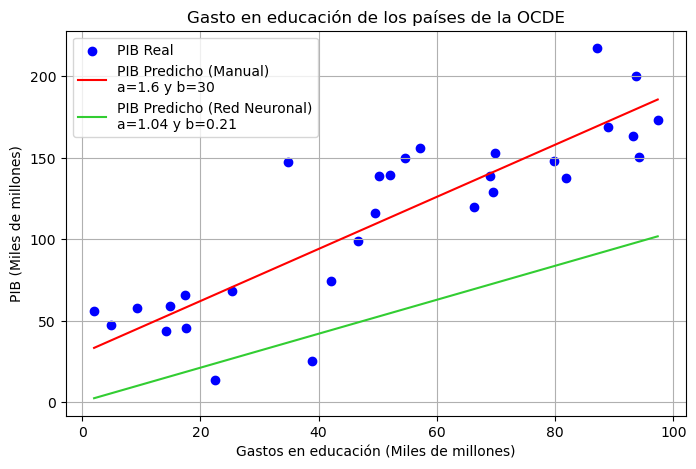

In [4]:
# Paso 3
# Ahora usando la siguiente red neuronal:

# def compile_fit(x,y,epochs):

# Entrena la red neuronal durante 200 épocas
# Muestra el resultado de la red neuronal sobre la gráfica anterior usando el método model.predict()
# Muestra el valor de a y b del modelo con las siguientes lineas

# a_pred=model.layers[0].get_weights()[0][0,0]
# b_pred=model.layers[0].get_weights()[1][0]

# --------------------------------------------------------
# FUNCIÓN PARA COMPILAR Y ENTRENAR LA RED NEURONAL
# --------------------------------------------------------
def compile_fit(x, y, epochs):
    # Estas líneas fijan las "semillas aleatorias"
    # Esto garantiza que si ejecutas el código varias veces, los resultados sean siempre los mismos
    np.random.seed(5)
    tf.random.set_seed(5)
    random.seed(5)
     
    # Creamos un modelo secuencial de Keras
    # "Secuencial" significa que las capas se apilan una tras otra
    model = Sequential()

    # Añadimos una capa densa con UNA sola neurona (Dense(1))
    # - input_dim=1 → solo una variable de entrada (el gasto en educación)
    # Esta neurona aprenderá dos parámetros:
    #   a → peso (pendiente)
    #   b → sesgo (intercepto)
    model.add(Dense(1, input_dim=1))

    # Compilamos el modelo
    # - 'mean_squared_error' es la función de pérdida (MSE)
    #   mide qué tan lejos están las predicciones del valor real.
    model.compile(loss='mean_squared_error')

    # Entrenamos el modelo con los datos (x, y)
    # - epochs = número de veces que la red verá todos los datos
    # - verbose=False → evita que muestre cada época en pantalla
    history = model.fit(x, y, verbose=False, epochs=epochs)

    # Devolvemos el modelo entrenado y su historial (por si se quiere analizar)
    return model, history


# --------------------------------------------------------
# PREPARAMOS LOS DATOS
# --------------------------------------------------------
# Convertimos la lista de listas en un arreglo NumPy
# Esto permite usar indexación tipo matriz ([:, 0]) y operaciones matemáticas vectorizadas
datos = np.array(get_datos())

# Separamos las dos columnas:
#   - x → gastos en educación
#   - y → PIB
x = datos[:, 0].reshape(-1, 1)  # (-1, 1) significa: "tantas filas como sea necesario, una sola columna"
y = datos[:, 1].reshape(-1, 1)


# --------------------------------------------------------
# MODELO LINEAL MANUAL (Y = a * X + b)
# --------------------------------------------------------
# Esta es una línea recta elegida "a mano" con valores de a y b fijados
a = 1.6   # pendiente (inclinación de la recta)
b = 30    # intercepto (donde la recta cruza el eje Y)
y_pred_lineal = a * x + b  # usamos x directamente para que la línea comience exactamente en el primer punto


# --------------------------------------------------------
# ENTRENAMOS LA RED NEURONAL
# --------------------------------------------------------
# Entrenamos el modelo con los datos reales durante 200 épocas
model, history = compile_fit(x, y, epochs=200)

# Obtenemos los valores de 'a' y 'b' que la red neuronal aprendió
# - get_weights()[0] → matriz de pesos (a)
# - get_weights()[1] → vector de sesgos (b)
a_pred = model.layers[0].get_weights()[0][0, 0]
b_pred = model.layers[0].get_weights()[1][0]

# Usamos el modelo entrenado para predecir los valores de PIB
# Usamos x directamente para que la línea comience exactamente en el primer punto
y_pred_nn = model.predict(x)


# --------------------------------------------------------
# GRÁFICA COMPARATIVA
# --------------------------------------------------------
plt.figure(figsize=(8, 5))  # Tamaño del gráfico (ancho=8, alto=5)

# Dibujamos los puntos reales (los datos originales)
plt.scatter(x, y, label="PIB Real", color='blue')

# Dibujamos la línea del modelo manual (la roja)
plt.plot(x, y_pred_lineal, color='red', label=f"PIB Predicho (Manual)\na={a} y b={b}")

# Dibujamos la línea del modelo de la red neuronal (la verde)
plt.plot(x, y_pred_nn, color='limegreen', label=f"PIB Predicho (Red Neuronal)\na={a_pred:.2f} y b={b_pred:.2f}")

# Añadimos título y etiquetas a los ejes
plt.title("Gasto en educación de los países de la OCDE")
plt.xlabel("Gastos en educación (Miles de millones)")
plt.ylabel("PIB (Miles de millones)")

# Mostramos leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Finalmente, mostramos la gráfica
plt.show()



In [5]:
# PASO 5
# Ahora vamos a calcular como de "buena" es nuestra red. Para ellos vamos a calcular "Perdida" o "Loss" de la red neuronal.
# Para ello:
# La formula que vamos a usar es Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error

def get_mse(y_true, y_pred):
    """
    Calcula el Error Cuadrático Medio (MSE) entre y_true y y_pred
    ESO CALCULA LA MEDIA DE LOS ERRORES ENTRE EL Y_TRUE Y EL Y_PRED
    """
    # Restamos los valores predichos de los valores reales, elevamos al cuadrado y hacemos la media
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# Predicción de la red neuronal sobre los datos reales
y_nn_pred_real = model.predict(x)

# Calculamos el MSE usando tu función
loss = get_mse(y, y_nn_pred_real)

print(f"Perdida (MSE) de la red neuronal: {loss:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Perdida (MSE) de la red neuronal: 4492.54


In [6]:
# Paso 6
# Si nos fijamos cuando hemos definido la red neuronal , el método model.compile hemos usado el argumento loss='mean_squared_error'

# 1
# model.compile(loss='mean_squared_error')
# Es decir que le estamos diciendo a la red neuronal que para entrenarse use el Mean Squared Error como función de pérdida.

# Así que resulta que no hace falta que nosotros calculemos el Mean Squared Error porque ya lo hace keras por nosotros. 
# La forma de acceder a ese valor es la siguiente, el método model.fit() nos retorna un objeto history que contiene las pérdidas al inicio de cada época. 
# Y podemos acceder al array de todas las pérdidas (una por época) mediante history.history['loss']

# history=model.fit(x, y,verbose=False, epochs=epochs) 
# loss=history.history['loss']
# En este caso loss es un array con la pérdida en cada época. 
# Imprime el valor de la pérdida de la última época y comparalo con el resultado del paso anterior.

# Entrenamos la red neuronal
model, history = compile_fit(x, y, epochs=200)

# Accedemos a la pérdida de la última época
loss_last_epoch = history.history['loss'][-1]

# Imprimimos
print(f"Pérdida (MSE) de la última época según Keras: {loss_last_epoch:.2f}")

# Para comparar, calculamos también el MSE sobre los datos reales usando nuestra función
y_nn_pred_real = model.predict(x)
loss_manual = get_mse(y, y_nn_pred_real)
print(f"MSE calculado manualmente: {loss_manual:.2f}")



Pérdida (MSE) de la última época según Keras: 4499.64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
MSE calculado manualmente: 4492.54


c:\Users\aleja\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pérdida (MSE) de la última época: 923.5864


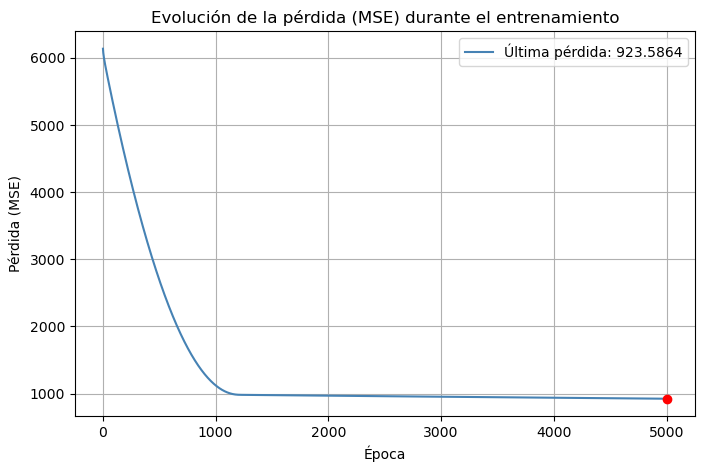

In [11]:
# Paso 7
# Ahora muestra una gráfica con todos los valores de loss para ver cómo va evolucionando la pérdida 
# y mostrar la última pérdida

# Entrenamos la red neuronal
epochs = 5000
model, history = compile_fit(x, y, epochs)

# Obtenemos todas las pérdidas por época
loss_values = history.history['loss']

# Mostramos la pérdida de la última época
loss_final = loss_values[-1]
print(f"Pérdida (MSE) de la última época: {loss_final:.4f}")

# --------------------------------------------------------
# GRÁFICA DE EVOLUCIÓN DE LA PÉRDIDA
# --------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_values) + 1), loss_values, color='steelblue', label=f"Última pérdida: {loss_final:.4f}")

# Marcamos la última pérdida en la gráfica
plt.scatter(len(loss_values), loss_final, color='red', zorder=5)

plt.title("Evolución de la pérdida (MSE) durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida (MSE)")
plt.grid(True)
plt.legend()
plt.show()
